In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PASCAL_2007)


In [3]:
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/test.csv'),Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/test'),Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/valid.json'),Path('/root/.fastai/data/pascal_2007/train.json')]

In [4]:
df = pd.read_csv(path/'train.csv')

In [5]:
df.head(10)

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True
5,000017.jpg,person horse,False
6,000019.jpg,cat,True
7,000020.jpg,car,True
8,000021.jpg,dog person,True
9,000023.jpg,bicycle person,False


In [6]:
(path/'train').ls()

(#5012) [Path('/root/.fastai/data/pascal_2007/train/009920.jpg'),Path('/root/.fastai/data/pascal_2007/train/007991.jpg'),Path('/root/.fastai/data/pascal_2007/train/007189.jpg'),Path('/root/.fastai/data/pascal_2007/train/008962.jpg'),Path('/root/.fastai/data/pascal_2007/train/007040.jpg'),Path('/root/.fastai/data/pascal_2007/train/005331.jpg'),Path('/root/.fastai/data/pascal_2007/train/000222.jpg'),Path('/root/.fastai/data/pascal_2007/train/004367.jpg'),Path('/root/.fastai/data/pascal_2007/train/008755.jpg'),Path('/root/.fastai/data/pascal_2007/train/009218.jpg')...]

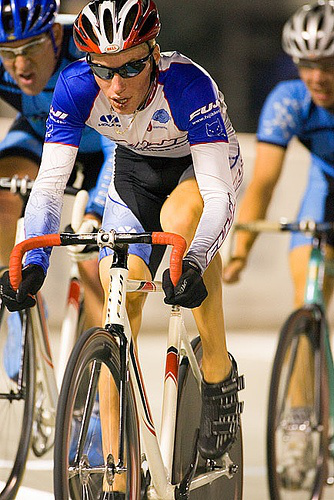

In [7]:
Image.open((path/'train'/'000023.jpg'))

In [8]:
img = Image.open((path/'train').ls()[0])
img.shape


(500, 334)

In [9]:
dblock = DataBlock()

dsets = dblock.datasets(df)

dsets.train[0]



(fname       002098.jpg
 labels          bottle
 is_valid          True
 Name: 1033, dtype: object,
 fname       002098.jpg
 labels          bottle
 is_valid          True
 Name: 1033, dtype: object)

In [10]:
dblock = DataBlock(get_x= lambda r: r['fname'], get_y = lambda r: r['labels'])

dsets = dblock.datasets(df)
dsets.train[0]

('000619.jpg', 'bird')

In [11]:
def get_x(r): return r['fname']
def get_y(r): return r['labels']

dblock = DataBlock(get_x=get_x, get_y=get_y)
dsets = dblock.datasets(df)
dsets.train[0]

('000632.jpg', 'tvmonitor sofa chair')

In [12]:
#completing the path and splitting the labels

def get_x(x): return path/'train'/x['fname']

def get_y(x): return x['labels'].split(' ')

In [13]:
dblock = DataBlock(get_x=get_x, get_y = get_y)
dsets = dblock.datasets(df)

In [14]:
dsets.train[0][0]

Path('/root/.fastai/data/pascal_2007/train/007723.jpg')

In [15]:
dblock = DataBlock(
    blocks=(ImageBlock,MultiCategoryBlock),
    get_x=get_x, get_y=get_y
)

In [16]:
dsets= dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=342x500,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
                      1., 0., 0., 0., 0.]))

In [17]:
idxs = torch.where(dsets.train[0][1]==1.)[0]
dsets.train.vocab[idxs]

(#3) ['dog','person','pottedplant']

In [18]:
def splitter(df):
  train = df.index[~df['is_valid']].tolist()
  valid = df.index[df['is_valid']].tolist()
  return train,valid

In [19]:
dblock = DataBlock(
    blocks=(ImageBlock,MultiCategoryBlock),
    splitter=splitter,
    get_x=get_x,
    get_y=get_y
)

In [20]:
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x333,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0.]))

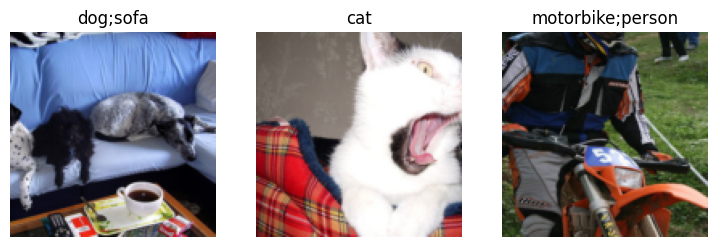

In [21]:
dblock = DataBlock(
    blocks=(ImageBlock,MultiCategoryBlock),
    splitter=splitter,
    get_x=get_x,get_y=get_y,
    item_tfms = RandomResizedCrop(128, min_scale=0.35)
)
dls = dblock.dataloaders(df)
dls.show_batch(nrows=1,ncols=3)

In [22]:
dls.train.one_batch()[0][0]

TensorImage([[[0.3765, 0.3529, 0.3294,  ..., 0.3137, 0.3137, 0.3059],
              [0.3490, 0.3333, 0.3216,  ..., 0.3020, 0.3020, 0.3020],
              [0.3137, 0.3098, 0.3059,  ..., 0.3059, 0.3059, 0.3098],
              ...,
              [0.6980, 0.6980, 0.7020,  ..., 0.4667, 0.4353, 0.4118],
              [0.6980, 0.6980, 0.7020,  ..., 0.4471, 0.4471, 0.4157],
              [0.6941, 0.7020, 0.6980,  ..., 0.4157, 0.4196, 0.4078]],

             [[0.4941, 0.4902, 0.4745,  ..., 0.4706, 0.4745, 0.4667],
              [0.4824, 0.4824, 0.4745,  ..., 0.4745, 0.4706, 0.4706],
              [0.4745, 0.4706, 0.4706,  ..., 0.4784, 0.4745, 0.4784],
              ...,
              [0.6980, 0.6980, 0.7020,  ..., 0.4549, 0.4235, 0.3961],
              [0.6980, 0.6980, 0.7020,  ..., 0.4314, 0.4275, 0.4000],
              [0.6941, 0.7020, 0.7020,  ..., 0.4000, 0.4039, 0.3961]],

             [[0.6392, 0.6392, 0.6392,  ..., 0.6549, 0.6471, 0.6314],
              [0.6314, 0.6353, 0.6353,  ..., 0.6

In [23]:
dblock.summary(df)

Setting-up type transforms pipelines
0     000005.jpg           chair      True
1     000007.jpg             car      True
2     000009.jpg    horse person      True
3     000012.jpg             car     False
4     000016.jpg         bicycle      True
...          ...             ...       ...
5006  009954.jpg    horse person      True
5007  009955.jpg            boat      True
5008  009958.jpg  person bicycle      True
5009  009959.jpg             car     False
5010  009961.jpg             dog     False

[5011 rows x 3 columns]
Found 5011 items
2 datasets of sizes 2501,2510
Setting up Pipeline: get_x -> PILBase.create
Setting up Pipeline: get_y -> MultiCategorize -- {'vocab': None, 'sort': True, 'add_na': False} -> OneHotEncode -- {'c': None}

Building one sample
  Pipeline: get_x -> PILBase.create
    starting from
      fname       000012.jpg
labels             car
is_valid         False
Name: 3, dtype: object
    applying get_x gives
      /root/.fastai/data/pascal_2007/train/00001

In [24]:

learn = vision_learner(dls,resnet18)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 226MB/s]


In [25]:
x,y = to_cpu(dls.train.one_batch())
activs = (learn.model(x))
activs[0]


TensorImage([ 0.4430, -2.0221, -0.3295, -1.7453,  2.4355,  4.8574, -0.1695,
              1.8171,  2.8799,  3.8793,  0.1435,  2.9182, -1.6445,  2.4427,
             -0.2308,  0.0959,  3.2587,  2.8001, -1.1339, -1.6859],
            grad_fn=<AliasBackward0>)

In [26]:
activs = TensorBase(activs)
activs[0]

TensorBase([ 0.4430, -2.0221, -0.3295, -1.7453,  2.4355,  4.8574, -0.1695,
             1.8171,  2.8799,  3.8793,  0.1435,  2.9182, -1.6445,  2.4427,
            -0.2308,  0.0959,  3.2587,  2.8001, -1.1339, -1.6859],
           grad_fn=<AliasBackward0>)

In [27]:
def binary_cross_entropy(inputs,targets):
  inputs = inputs.sigmoid()
  return -torch.where(targets==1,inputs,1-inputs).log().mean()

In [28]:
loss_func = nn.BCEWithLogitsLoss()
loss = loss_func(activs,y)
loss

TensorMultiCategory(1.0467, grad_fn=<AliasBackward0>)

In [29]:
def accuracy_multis(inp,targ,thresh=0.5,sigmoid=True):
  if sigmoid:
    inp = inp.sigmoid()
  return ((inp>thresh)==targ.bool()).float().mean()

In [30]:
learn = vision_learner(dls,resnet50, metrics=partial(accuracy_multi,thresh=0.2))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 163MB/s]


SuggestedLRs(valley=0.001737800776027143)

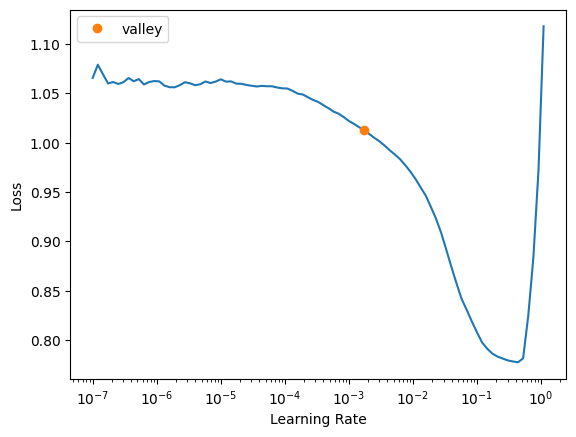

In [31]:
learn.lr_find()

In [32]:
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.949290,0.694785,0.244343,00:34
1,0.826882,0.565930,0.284602,00:34
2,0.609825,0.207716,0.813386,00:33
3,0.363153,0.123406,0.942132,00:34


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.133334,0.116883,0.942410,00:35
1,0.116719,0.109218,0.951952,00:34
2,0.096878,0.104528,0.953227,00:34


In [33]:
learn.metrics = partial(accuracy_multi,thresh=0.1)
learn.validate()

(#2) [0.10452806949615479,0.9337251782417297]

In [34]:
learn.metrics= partial(accuracy_multi,thresh=0.99)
learn.validate()

(#2) [0.10452806949615479,0.9448804259300232]

In [35]:
preds, targets = learn.get_preds()

In [36]:
accuracy_multi(preds,targets,thresh=0.9,sigmoid=False)

TensorBase(0.9575)

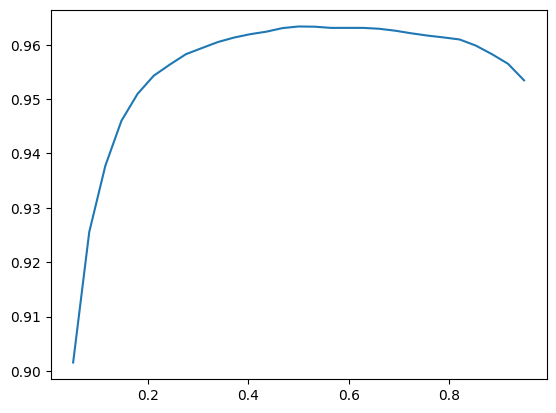

In [37]:
xs = torch.linspace(0.05,0.95,29)
accs = [accuracy_multi(preds,targets,thresh=i,sigmoid=False) for i in xs]
plt.plot(xs,accs)

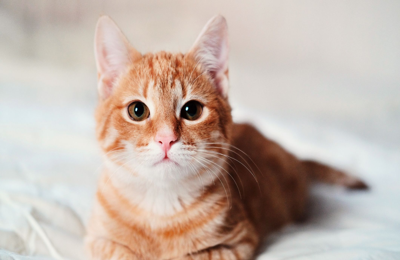

In [47]:
img2= Image.open('cat2.jpg')
img2 = img2.resize((400,260))
img2

In [44]:

learn.predict('cat2.jpg')

((#1) ['cat'],
 tensor([False, False, False, False, False, False, False,  True, False, False,
         False, False, False, False, False, False, False, False, False, False]),
 tensor([3.5649e-05, 3.1492e-05, 1.2495e-05, 1.9923e-04, 1.5855e-04, 1.9092e-05,
         7.6379e-05, 9.9994e-01, 3.2895e-04, 8.0739e-06, 5.6187e-05, 4.5063e-04,
         7.4859e-06, 3.1349e-05, 1.9734e-03, 3.6771e-04, 2.9284e-05, 2.4402e-04,
         1.7946e-05, 5.3891e-05]))